# 🎯 Practical Work Objective Summary

## **Master Linear Model Training with Interactive PyTorch Implementation**

### **Main Goal:**
Train a PyTorch linear regression model to learn the relationship **`y = 2x + 1`** from noisy synthetic data, while understanding every step of the machine learning pipeline through interactive visualizations.

### **Key Learning Objectives:**
- **Build & Train Models**: Implement linear regression using PyTorch's `nn.Module`
- **Interactive Exploration**: Use real-time sliders to understand parameter impact on predictions
- **Complete ML Pipeline**: Master data generation → model design → training → evaluation
- **Visual Understanding**: Explore 3D loss landscapes and optimization trajectories
- **Architecture Comparison**: Compare Linear vs. Polynomial vs. Neural Network approaches

### **Industrial Relevance:**
Apply learned concepts to real-world scenarios like **process control**, **quality prediction**, and **predictive maintenance** in industrial systems.

### **Interactive Features:**
🎮 Real-time parameter adjustment | 📊 3D loss visualization | ⚡ Live training monitoring | 🔬 Architecture experimentation

**Duration**: 3-4 hours | **Assessment**: Comprehensive questionnaire | **Outcome**: Solid foundation for industrial AI applications

---

# Linear Model Training Tutorial with PyTorch

## Interactive Learning: From Theory to Practice

Welcome to this comprehensive tutorial on training linear models using PyTorch! In this notebook, you'll learn:

- 🎯 How to create and train a linear model to predict noisy data
- 📊 Interactive visualization of loss functions under different weight conditions  
- 🔄 The complete training pipeline: forward pass, loss calculation, backpropagation
- 📈 Model evaluation and performance metrics
- 🏗️ Experimenting with different model architectures

**Learning Objective**: Train a model to predict values following the relationship `y = 2x + 1` with added noise.

---

## 1. Import Required Libraries

Let's start by importing all the libraries we'll need for this tutorial:

### 🎮 Interactive Mode Enabled

This notebook now features **full interactive widgets** for enhanced learning experience! You can:

- **Use sliders** to adjust parameters and see real-time changes
- **Interactive plots** that update automatically as you modify values
- **Real-time exploration** of different model configurations
- **Dynamic visualizations** that respond to your inputs instantly

The interactive widgets make learning more engaging and intuitive, allowing you to experiment with different parameters and immediately see their effects on model behavior!

In [1]:
# Core libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Interactive widgets for better user experience
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output

# Set style and random seeds for reproducibility
plt.style.use('seaborn-v0_8')
np.random.seed(42)
torch.manual_seed(42)

# Configure matplotlib for interactive plots
%matplotlib widget

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
print(f"PyTorch version: {torch.__version__}")

print("🎮 Interactive widgets enabled!")
print("   You can now use sliders and interactive controls to explore parameters in real-time.")
print("   The notebook has been upgraded from WSL-compatible static mode to full interactive mode.")

Using device: cpu
PyTorch version: 2.9.1+cpu
🎮 Interactive widgets enabled!
   You can now use sliders and interactive controls to explore parameters in real-time.
   The notebook has been upgraded from WSL-compatible static mode to full interactive mode.


## 2. Generate Synthetic Dataset

We'll create a dataset following the relationship `y = 2x + 1` with added Gaussian noise to simulate real-world data conditions.

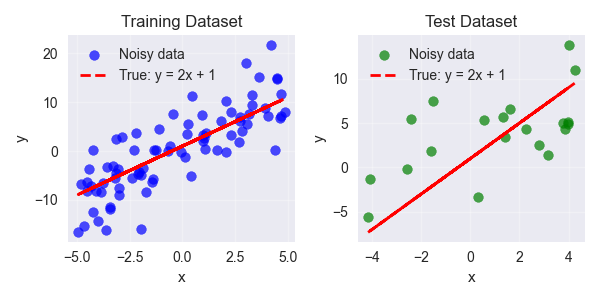

Training samples: 80
Test samples: 20
Noise standard deviation: 5.0
Data range: x ∈ [-4.94, 4.87]


In [2]:
def generate_dataset(n_samples=100, noise_std=0.5, x_range=(-5, 5)):
    """
    Generate synthetic dataset following y = 2x + 1 + noise
    
    Parameters:
    - n_samples: Number of data points
    - noise_std: Standard deviation of Gaussian noise
    - x_range: Range of x values (min, max)
    """
    # Generate x values uniformly distributed
    x = np.random.uniform(x_range[0], x_range[1], n_samples)
    
    # True relationship: y = 2x + 1
    y_true = 2 * x + 1
    
    # Add Gaussian noise
    noise = np.random.normal(0, noise_std, n_samples)
    y_noisy = y_true + noise
    
    return x, y_noisy, y_true

# Generate training and test datasets
n_train, n_test = 80, 20
noise_level = 5.0

x_train, y_train, y_train_true = generate_dataset(n_train, noise_level)
x_test, y_test, y_test_true = generate_dataset(n_test, noise_level)

# Convert to PyTorch tensors
x_train_tensor = torch.FloatTensor(x_train).unsqueeze(1).to(device)
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1).to(device)
x_test_tensor = torch.FloatTensor(x_test).unsqueeze(1).to(device)
y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1).to(device)

# Visualize the dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))

# Training data
ax1.scatter(x_train, y_train, alpha=0.7, label='Noisy data', color='blue')
ax1.plot(x_train, y_train_true, 'r--', label='True: y = 2x + 1', linewidth=2)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Training Dataset')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Test data
ax2.scatter(x_test, y_test, alpha=0.7, label='Noisy data', color='green')
ax2.plot(x_test, y_test_true, 'r--', label='True: y = 2x + 1', linewidth=2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Test Dataset')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Training samples: {len(x_train)}")
print(f"Test samples: {len(x_test)}")
print(f"Noise standard deviation: {noise_level}")
print(f"Data range: x ∈ [{x_train.min():.2f}, {x_train.max():.2f}]")

## 3. Define Linear Model Architecture

Let's implement a simple linear regression model using PyTorch's `nn.Module`. Our goal is to learn the parameters `weight` and `bias` such that `y = weight * x + bias` approximates our target function `y = 2x + 1`.

In [3]:
class LinearModel(nn.Module):
    """
    Simple Linear Regression Model: y = weight * x + bias
    """
    def __init__(self, input_dim=1, output_dim=1):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
        # Initialize weights and bias
        self.reset_parameters()
    
    def reset_parameters(self):
        """Reset parameters to random values"""
        nn.init.normal_(self.linear.weight, mean=0.0, std=1.0)
        nn.init.normal_(self.linear.bias, mean=0.0, std=1.0)
    
    def forward(self, x):
        return self.linear(x)
    
    def get_parameters(self):
        """Get current weight and bias values"""
        weight = self.linear.weight.item()
        bias = self.linear.bias.item()
        return weight, bias
    
    def set_parameters(self, weight, bias):
        """Manually set weight and bias values"""
        with torch.no_grad():
            self.linear.weight.data.fill_(weight)
            self.linear.bias.data.fill_(bias)

# Create model instance
model = LinearModel().to(device)

# Display initial parameters
weight, bias = model.get_parameters()
print(f"Initial model parameters:")
print(f"Weight: {weight:.4f}")
print(f"Bias: {bias:.4f}")
print(f"\nModel architecture:")
print(model)

# Test forward pass
test_input = torch.tensor([[1.0], [2.0], [3.0]]).to(device)
test_output = model(test_input)
print(f"\nTest forward pass:")
print(f"Input: {test_input.squeeze().tolist()}")
print(f"Output: {test_output.squeeze().tolist()}")

Initial model parameters:
Weight: 0.4740
Bias: 0.1978

Model architecture:
LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

Test forward pass:
Input: [1.0, 2.0, 3.0]
Output: [0.6718267202377319, 1.145866870880127, 1.619907021522522]


## 4. Interactive Weight Visualization

Now let's create an interactive visualization to see how changing the model parameters affects the predictions. This will help you understand the relationship between model parameters and the resulting predictions.

In [4]:
def plot_predictions_interactive(weight=1.0, bias=0.0):
    """
    Interactive function to visualize predictions with real-time parameter adjustment
    """
    # Set model parameters
    model.set_parameters(weight, bias)
    
    # Generate predictions for plotting
    x_plot = np.linspace(-6, 6, 100)
    x_plot_tensor = torch.FloatTensor(x_plot).unsqueeze(1).to(device)
    
    with torch.no_grad():
        y_pred_plot = model(x_plot_tensor).cpu().numpy().squeeze()
    
    # Calculate loss on training data
    with torch.no_grad():
        y_pred_train = model(x_train_tensor)
        loss = nn.MSELoss()(y_pred_train, y_train_tensor).item()
    
    # Create the plot
    plt.figure(figsize=(6, 4))
    
    # Plot training data
    plt.scatter(x_train, y_train, alpha=0.7, label='Training data', color='blue', s=50)
    
    # Plot true function
    y_true_plot = 2 * x_plot + 1
    plt.plot(x_plot, y_true_plot, 'r--', label='True: y = 2x + 1', linewidth=3)
    
    # Plot model prediction
    plt.plot(x_plot, y_pred_plot, 'g-', label=f'Model: y = {weight:.2f}x + {bias:.2f}', linewidth=3)
    
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title(f'Interactive Parameter Exploration\nMSE Loss: {loss:.4f}', fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.xlim(-6, 6)
    plt.ylim(-15, 15)
    
    # Add performance text box
    distance_to_optimal = np.sqrt((weight - 2.0)**2 + (bias - 1.0)**2)
    textstr = f'Weight: {weight:.2f}\nBias: {bias:.2f}\nMSE Loss: {loss:.4f}\n\nTarget: w=2.0, b=1.0\nDistance: {distance_to_optimal:.3f}'
    props = dict(boxstyle='round', facecolor='lightblue', alpha=0.8)
    plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.show()

# Create interactive widget for parameter exploration
print("🎯 Interactive Parameter Exploration")
print("Use the sliders below to adjust weight and bias values and see real-time updates!")

# Create interactive sliders
weight_slider = widgets.FloatSlider(
    value=0.0,
    min=-3.0,
    max=5.0,
    step=0.1,
    description='Weight:',
    style={'description_width': 'initial'}
)

bias_slider = widgets.FloatSlider(
    value=0.0,
    min=-3.0,
    max=5.0,
    step=0.1,
    description='Bias:',
    style={'description_width': 'initial'}
)

# Create the interactive widget
interactive_plot = interactive(plot_predictions_interactive, 
                              weight=weight_slider, 
                              bias=bias_slider)

# Display the widget
display(interactive_plot)

# Add some preset buttons for quick exploration
def set_random():
    weight_slider.value = np.random.uniform(-2, 4)
    bias_slider.value = np.random.uniform(-2, 4)

def set_optimal():
    weight_slider.value = 2.0
    bias_slider.value = 1.0

def set_zeros():
    weight_slider.value = 0.0
    bias_slider.value = 0.0

# Create preset buttons
random_button = widgets.Button(description="Random Parameters", button_style='info')
optimal_button = widgets.Button(description="Optimal (2, 1)", button_style='success')
zeros_button = widgets.Button(description="Reset to Zero", button_style='warning')

random_button.on_click(lambda b: set_random())
optimal_button.on_click(lambda b: set_optimal())
zeros_button.on_click(lambda b: set_zeros())

# Display preset buttons
print("\n🔧 Quick preset buttons:")
button_box = widgets.HBox([zeros_button, random_button, optimal_button])
display(button_box)

print("\n💡 Tips:")
print("• Move the sliders to see how different parameters affect the model prediction")
print("• Watch how the loss changes as you get closer to the optimal values (weight=2, bias=1)")
print("• Try the preset buttons for quick parameter changes")
print("• The green line shows your current model, red dashed line shows the true function")

🎯 Interactive Parameter Exploration
Use the sliders below to adjust weight and bias values and see real-time updates!


interactive(children=(FloatSlider(value=0.0, description='Weight:', max=5.0, min=-3.0, style=SliderStyle(descr…


🔧 Quick preset buttons:



💡 Tips:
• Move the sliders to see how different parameters affect the model prediction
• Watch how the loss changes as you get closer to the optimal values (weight=2, bias=1)
• Try the preset buttons for quick parameter changes
• The green line shows your current model, red dashed line shows the true function


## 5. Loss Function Implementation and Visualization

Understanding loss functions is crucial for training neural networks. Let's explore different loss functions and visualize how the loss changes with different parameter values.

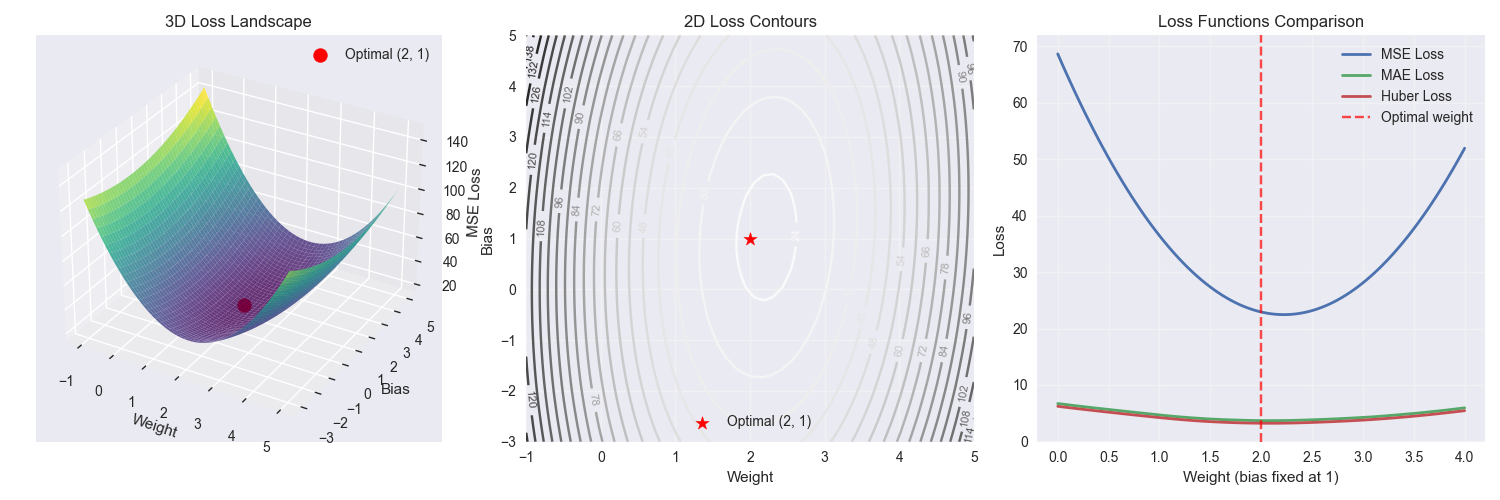

Optimal parameters: weight=2, bias=1
Loss at optimal point: 22.9340

🔍 Interactive Loss Function Exploration
Use the controls below to explore different loss functions and parameter values!


interactive(children=(FloatSlider(value=1.0, description='Weight:', max=5.0, min=-1.0, style=SliderStyle(descr…


💡 Interactive Loss Exploration Tips:
• Change the loss function to see how different loss types behave
• Move the weight and bias sliders to explore the loss landscape
• MSE: Penalizes large errors more heavily (squared difference)
• MAE: Linear penalty for errors (absolute difference)
• Huber: Combination of MSE and MAE (robust to outliers)
• Watch how the contour plots change for different loss functions!


In [5]:
def calculate_loss(weight, bias, loss_type='mse'):
    """
    Calculate loss for given weight and bias values
    """
    model.set_parameters(weight, bias)
    
    with torch.no_grad():
        predictions = model(x_train_tensor)
        
        if loss_type == 'mse':
            loss = nn.MSELoss()(predictions, y_train_tensor).item()
        elif loss_type == 'mae':
            loss = nn.L1Loss()(predictions, y_train_tensor).item()
        elif loss_type == 'huber':
            loss = nn.SmoothL1Loss()(predictions, y_train_tensor).item()
        
    return loss

# Create 3D loss landscape visualization
def plot_loss_landscape():
    """
    Create a 3D visualization of the loss landscape
    """
    # Create grid of weight and bias values
    weights = np.linspace(-1, 5, 50)
    biases = np.linspace(-3, 5, 50)
    W, B = np.meshgrid(weights, biases)
    
    # Calculate loss for each combination
    losses = np.zeros_like(W)
    for i in range(len(weights)):
        for j in range(len(biases)):
            losses[j, i] = calculate_loss(weights[i], biases[j])
    
    # Create 3D surface plot
    fig = plt.figure(figsize=(15, 5))
    
    # 3D surface plot
    ax1 = fig.add_subplot(131, projection='3d')
    surf = ax1.plot_surface(W, B, losses, cmap='viridis', alpha=0.8)
    ax1.set_xlabel('Weight')
    ax1.set_ylabel('Bias')
    ax1.set_zlabel('MSE Loss')
    ax1.set_title('3D Loss Landscape')
    
    # Mark the optimal point (true parameters)
    optimal_loss = calculate_loss(2, 1)
    ax1.scatter([2], [1], [optimal_loss], color='red', s=100, label='Optimal (2, 1)')
    ax1.legend()
    
    # 2D contour plot
    ax2 = fig.add_subplot(132)
    contour = ax2.contour(W, B, losses, levels=20)
    ax2.clabel(contour, inline=True, fontsize=8)
    ax2.scatter([2], [1], color='red', s=100, marker='*', label='Optimal (2, 1)')
    ax2.set_xlabel('Weight')
    ax2.set_ylabel('Bias')
    ax2.set_title('2D Loss Contours')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Loss comparison for different loss functions
    ax3 = fig.add_subplot(133)
    weight_range = np.linspace(0, 4, 100)
    mse_losses = [calculate_loss(w, 1, 'mse') for w in weight_range]
    mae_losses = [calculate_loss(w, 1, 'mae') for w in weight_range]
    huber_losses = [calculate_loss(w, 1, 'huber') for w in weight_range]
    
    ax3.plot(weight_range, mse_losses, label='MSE Loss', linewidth=2)
    ax3.plot(weight_range, mae_losses, label='MAE Loss', linewidth=2)
    ax3.plot(weight_range, huber_losses, label='Huber Loss', linewidth=2)
    ax3.axvline(x=2, color='red', linestyle='--', alpha=0.7, label='Optimal weight')
    ax3.set_xlabel('Weight (bias fixed at 1)')
    ax3.set_ylabel('Loss')
    ax3.set_title('Loss Functions Comparison')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Optimal parameters: weight=2, bias=1")
    print(f"Loss at optimal point: {optimal_loss:.4f}")

# Display the static loss landscape first
plot_loss_landscape()

# Interactive loss exploration function
def explore_loss_interactive(weight=1.0, bias=1.0, loss_type='mse'):
    """
    Interactive function to explore different loss functions and parameter values
    """
    # Calculate losses for different loss functions
    mse_loss = calculate_loss(weight, bias, 'mse')
    mae_loss = calculate_loss(weight, bias, 'mae')
    huber_loss = calculate_loss(weight, bias, 'huber')
    
    # Calculate optimal losses for comparison
    mse_optimal = calculate_loss(2, 1, 'mse')
    mae_optimal = calculate_loss(2, 1, 'mae')
    huber_optimal = calculate_loss(2, 1, 'huber')
    
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
    
    # Loss comparison bar chart
    loss_names = ['MSE', 'MAE', 'Huber']
    current_losses = [mse_loss, mae_loss, huber_loss]
    optimal_losses = [mse_optimal, mae_optimal, huber_optimal]
    
    x_pos = np.arange(len(loss_names))
    width = 0.35
    
    bars1 = ax1.bar(x_pos - width/2, current_losses, width, label=f'Current (w={weight:.2f}, b={bias:.2f})', alpha=0.8)
    bars2 = ax1.bar(x_pos + width/2, optimal_losses, width, label='Optimal (w=2.0, b=1.0)', alpha=0.8)
    
    ax1.set_xlabel('Loss Function')
    ax1.set_ylabel('Loss Value')
    ax1.set_title('Loss Function Comparison')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(loss_names)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Highlight selected loss function
    selected_idx = {'mse': 0, 'mae': 1, 'huber': 2}[loss_type]
    bars1[selected_idx].set_color('red')
    bars1[selected_idx].set_alpha(1.0)
    
    # Current loss details
    current_loss = current_losses[selected_idx]
    optimal_loss = optimal_losses[selected_idx]
    difference = current_loss - optimal_loss
    
    # Parameter space visualization with current point
    weights_grid = np.linspace(-1, 5, 30)
    biases_grid = np.linspace(-3, 5, 30)
    W_grid, B_grid = np.meshgrid(weights_grid, biases_grid)
    
    # Calculate loss surface for selected loss type
    losses_grid = np.zeros_like(W_grid)
    for i in range(len(weights_grid)):
        for j in range(len(biases_grid)):
            losses_grid[j, i] = calculate_loss(weights_grid[i], biases_grid[j], loss_type)
    
    # Plot contour map
    contour = ax2.contour(W_grid, B_grid, losses_grid, levels=15, alpha=0.6)
    ax2.clabel(contour, inline=True, fontsize=8)
    
    # Mark current point and optimal point
    ax2.scatter([weight], [bias], color='red', s=150, marker='o', label=f'Current ({weight:.2f}, {bias:.2f})', zorder=5)
    ax2.scatter([2], [1], color='blue', s=150, marker='*', label='Optimal (2.0, 1.0)', zorder=5)
    
    ax2.set_xlabel('Weight')
    ax2.set_ylabel('Bias')
    ax2.set_title(f'{loss_type.upper()} Loss Landscape')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed information
    print(f"📊 Loss Analysis for {loss_type.upper()}:")
    print(f"Current loss: {current_loss:.6f}")
    print(f"Optimal loss: {optimal_loss:.6f}")
    print(f"Difference: {difference:+.6f}")
    print(f"Distance from optimal: {np.sqrt((weight-2)**2 + (bias-1)**2):.3f}")

# Create interactive widget for loss exploration
print("\n🔍 Interactive Loss Function Exploration")
print("Use the controls below to explore different loss functions and parameter values!")

# Create widgets for loss exploration
weight_loss_slider = widgets.FloatSlider(
    value=1.0,
    min=-1.0,
    max=5.0,
    step=0.1,
    description='Weight:',
    style={'description_width': 'initial'}
)

bias_loss_slider = widgets.FloatSlider(
    value=1.0,
    min=-3.0,
    max=5.0,
    step=0.1,
    description='Bias:',
    style={'description_width': 'initial'}
)

loss_type_dropdown = widgets.Dropdown(
    options=['mse', 'mae', 'huber'],
    value='mse',
    description='Loss Function:',
    style={'description_width': 'initial'}
)

# Create the interactive widget for loss exploration
interactive_loss = interactive(explore_loss_interactive, 
                              weight=weight_loss_slider, 
                              bias=bias_loss_slider,
                              loss_type=loss_type_dropdown)

display(interactive_loss)

print("\n💡 Interactive Loss Exploration Tips:")
print("• Change the loss function to see how different loss types behave")
print("• Move the weight and bias sliders to explore the loss landscape")
print("• MSE: Penalizes large errors more heavily (squared difference)")
print("• MAE: Linear penalty for errors (absolute difference)")
print("• Huber: Combination of MSE and MAE (robust to outliers)")
print("• Watch how the contour plots change for different loss functions!")

## 6. Training Loop Implementation

Now let's implement the complete training pipeline with gradient descent, backpropagation, and parameter updates. This is where the magic of machine learning happens!

In [6]:
def train_model(model, x_train, y_train, x_test, y_test, 
                learning_rate=0.01, num_epochs=100, optimizer_type='sgd'):
    """
    Complete training loop with logging and visualization
    """
    # Initialize optimizer
    if optimizer_type == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    elif optimizer_type == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_type == 'rmsprop':
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)
    
    # Loss function
    criterion = nn.MSELoss()
    
    # Tracking lists
    train_losses = []
    test_losses = []
    weights_history = []
    biases_history = []
    
    # Check if model has get_parameters method (only LinearModel does)
    has_get_parameters = hasattr(model, 'get_parameters')
    
    # Training loop
    model.train()
    for epoch in range(num_epochs):
        # Forward pass
        predictions = model(x_train)
        train_loss = criterion(predictions, y_train)
        
        # Backward pass
        optimizer.zero_grad()  # Clear gradients
        train_loss.backward()  # Compute gradients
        optimizer.step()       # Update parameters
        
        # Evaluation on test set
        model.eval()
        with torch.no_grad():
            test_predictions = model(x_test)
            test_loss = criterion(test_predictions, y_test)
        model.train()
        
        # Store metrics
        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())
        
        # Only track weight/bias for LinearModel
        if has_get_parameters:
            weight, bias = model.get_parameters()
            weights_history.append(weight)
            biases_history.append(bias)
        else:
            # For non-linear models, just track dummy values
            weights_history.append(0.0)
            biases_history.append(0.0)
        
        # Print progress
        if (epoch + 1) % 20 == 0:
            if has_get_parameters:
                weight, bias = model.get_parameters()
                print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, '
                      f'Test Loss: {test_loss.item():.4f}, Weight: {weight:.3f}, Bias: {bias:.3f}')
            else:
                print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, '
                      f'Test Loss: {test_loss.item():.4f}')
    
    return train_losses, test_losses, weights_history, biases_history

# Reset model to random parameters
model.reset_parameters()
initial_weight, initial_bias = model.get_parameters()
print(f"Initial parameters: Weight={initial_weight:.4f}, Bias={initial_bias:.4f}")

# Train the model
print("\\n🚀 Starting training...")
train_losses, test_losses, weights_history, biases_history = train_model(
    model, x_train_tensor, y_train_tensor, x_test_tensor, y_test_tensor,
    learning_rate=0.01, num_epochs=200, optimizer_type='sgd'
)

# Final parameters
final_weight, final_bias = model.get_parameters()
print(f"\\n✅ Training completed!")
print(f"Final parameters: Weight={final_weight:.4f}, Bias={final_bias:.4f}")
print(f"Target parameters: Weight=2.0000, Bias=1.0000")
print(f"Final train loss: {train_losses[-1]:.4f}")
print(f"Final test loss: {test_losses[-1]:.4f}")

Initial parameters: Weight=1.1561, Bias=0.3965
\n🚀 Starting training...
Epoch [20/200], Train Loss: 22.6808, Test Loss: 25.4471, Weight: 2.190, Bias: 0.577
Epoch [40/200], Train Loss: 22.5610, Test Loss: 25.5611, Weight: 2.212, Bias: 0.725
Epoch [60/200], Train Loss: 22.5087, Test Loss: 25.4797, Weight: 2.216, Bias: 0.825
Epoch [80/200], Train Loss: 22.4851, Test Loss: 25.4344, Weight: 2.219, Bias: 0.892
Epoch [100/200], Train Loss: 22.4745, Test Loss: 25.4095, Weight: 2.221, Bias: 0.937
Epoch [120/200], Train Loss: 22.4697, Test Loss: 25.3953, Weight: 2.222, Bias: 0.967
Epoch [140/200], Train Loss: 22.4676, Test Loss: 25.3869, Weight: 2.223, Bias: 0.988
Epoch [160/200], Train Loss: 22.4666, Test Loss: 25.3818, Weight: 2.224, Bias: 1.001
Epoch [180/200], Train Loss: 22.4661, Test Loss: 25.3785, Weight: 2.224, Bias: 1.010
Epoch [200/200], Train Loss: 22.4660, Test Loss: 25.3765, Weight: 2.224, Bias: 1.017
\n✅ Training completed!
Final parameters: Weight=2.2242, Bias=1.0165
Target parame

## 7. Model Evaluation and Metrics

Let's evaluate our trained model using various metrics and create comprehensive visualizations to understand its performance.

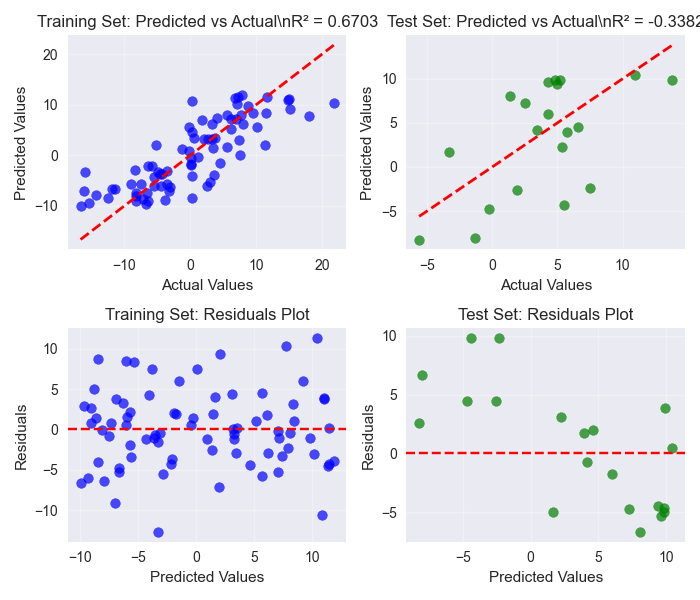

📊 MODEL EVALUATION METRICS
Metric          Training     Test        
--------------------------------------------------
MSE             22.4659      25.3765     
MAE             3.7037       4.3747      
R² Score        0.6703       -0.3382     
RMSE            4.7398       5.0375      
\n🎯 PARAMETER ANALYSIS
------------------------------
Learned weight: 2.2242 (target: 2.0000)
Learned bias:   1.0165 (target: 1.0000)
Weight error:   0.2242
Bias error:     0.0165


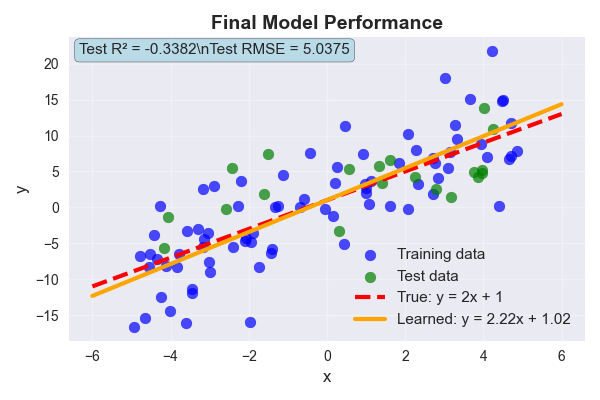

In [7]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    """
    Comprehensive model evaluation with multiple metrics
    """
    model.eval()
    
    with torch.no_grad():
        # Get predictions
        train_pred = model(x_train).cpu().numpy()
        test_pred = model(x_test).cpu().numpy()
        
        # Convert to numpy
        y_train_np = y_train.cpu().numpy()
        y_test_np = y_test.cpu().numpy()
        x_train_np = x_train.cpu().numpy()
        x_test_np = x_test.cpu().numpy()
        
        # Calculate metrics
        train_mse = mean_squared_error(y_train_np, train_pred)
        test_mse = mean_squared_error(y_test_np, test_pred)
        train_mae = mean_absolute_error(y_train_np, train_pred)
        test_mae = mean_absolute_error(y_test_np, test_pred)
        train_r2 = r2_score(y_train_np, train_pred)
        test_r2 = r2_score(y_test_np, test_pred)
        
        # Create evaluation plots
        fig, axes = plt.subplots(2, 2, figsize=(7, 6))
        
        # 1. Predictions vs Actual (Training)
        axes[0, 0].scatter(y_train_np, train_pred, alpha=0.7, color='blue')
        axes[0, 0].plot([y_train_np.min(), y_train_np.max()], 
                       [y_train_np.min(), y_train_np.max()], 'r--', lw=2)
        axes[0, 0].set_xlabel('Actual Values')
        axes[0, 0].set_ylabel('Predicted Values')
        axes[0, 0].set_title(f'Training Set: Predicted vs Actual\\nR² = {train_r2:.4f}')
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Predictions vs Actual (Test)
        axes[0, 1].scatter(y_test_np, test_pred, alpha=0.7, color='green')
        axes[0, 1].plot([y_test_np.min(), y_test_np.max()], 
                       [y_test_np.min(), y_test_np.max()], 'r--', lw=2)
        axes[0, 1].set_xlabel('Actual Values')
        axes[0, 1].set_ylabel('Predicted Values')
        axes[0, 1].set_title(f'Test Set: Predicted vs Actual\\nR² = {test_r2:.4f}')
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Residuals plot (Training)
        train_residuals = y_train_np.flatten() - train_pred.flatten()
        axes[1, 0].scatter(train_pred, train_residuals, alpha=0.7, color='blue')
        axes[1, 0].axhline(y=0, color='red', linestyle='--')
        axes[1, 0].set_xlabel('Predicted Values')
        axes[1, 0].set_ylabel('Residuals')
        axes[1, 0].set_title('Training Set: Residuals Plot')
        axes[1, 0].grid(True, alpha=0.3)
        
        # 4. Residuals plot (Test)
        test_residuals = y_test_np.flatten() - test_pred.flatten()
        axes[1, 1].scatter(test_pred, test_residuals, alpha=0.7, color='green')
        axes[1, 1].axhline(y=0, color='red', linestyle='--')
        axes[1, 1].set_xlabel('Predicted Values')
        axes[1, 1].set_ylabel('Residuals')
        axes[1, 1].set_title('Test Set: Residuals Plot')
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Print metrics table
        print("📊 MODEL EVALUATION METRICS")
        print("=" * 50)
        print(f"{'Metric':<15} {'Training':<12} {'Test':<12}")
        print("-" * 50)
        print(f"{'MSE':<15} {train_mse:<12.4f} {test_mse:<12.4f}")
        print(f"{'MAE':<15} {train_mae:<12.4f} {test_mae:<12.4f}")
        print(f"{'R² Score':<15} {train_r2:<12.4f} {test_r2:<12.4f}")
        print(f"{'RMSE':<15} {np.sqrt(train_mse):<12.4f} {np.sqrt(test_mse):<12.4f}")
        
        # Parameter analysis
        weight, bias = model.get_parameters()
        print(f"\\n🎯 PARAMETER ANALYSIS")
        print("-" * 30)
        print(f"Learned weight: {weight:.4f} (target: 2.0000)")
        print(f"Learned bias:   {bias:.4f} (target: 1.0000)")
        print(f"Weight error:   {abs(weight - 2.0):.4f}")
        print(f"Bias error:     {abs(bias - 1.0):.4f}")
        
        return {
            'train_mse': train_mse, 'test_mse': test_mse,
            'train_mae': train_mae, 'test_mae': test_mae,
            'train_r2': train_r2, 'test_r2': test_r2,
            'weight': weight, 'bias': bias
        }

# Evaluate the trained model
evaluation_results = evaluate_model(model, x_train_tensor, y_train_tensor, 
                                  x_test_tensor, y_test_tensor)

# Create final prediction plot
plt.figure(figsize=(6, 4))

# Plot data and predictions
x_plot = np.linspace(-6, 6, 100)
x_plot_tensor = torch.FloatTensor(x_plot).unsqueeze(1).to(device)

with torch.no_grad():
    y_pred_plot = model(x_plot_tensor).cpu().numpy().squeeze()

# Training data
plt.scatter(x_train, y_train, alpha=0.7, label='Training data', color='blue', s=60)
# Test data
plt.scatter(x_test, y_test, alpha=0.7, label='Test data', color='green', s=60)

# True function
y_true_plot = 2 * x_plot + 1
plt.plot(x_plot, y_true_plot, 'r--', label='True: y = 2x + 1', linewidth=3)

# Model prediction
weight, bias = model.get_parameters()
plt.plot(x_plot, y_pred_plot, 'orange', 
         label=f'Learned: y = {weight:.2f}x + {bias:.2f}', linewidth=3)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Final Model Performance', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add performance text
textstr = f'Test R² = {evaluation_results["test_r2"]:.4f}\\nTest RMSE = {np.sqrt(evaluation_results["test_mse"]):.4f}'
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.8)
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

## 8. Interactive Training Visualization

Let's create real-time visualizations showing how the loss decreases and parameters evolve during training. This will help you understand the learning process dynamically.

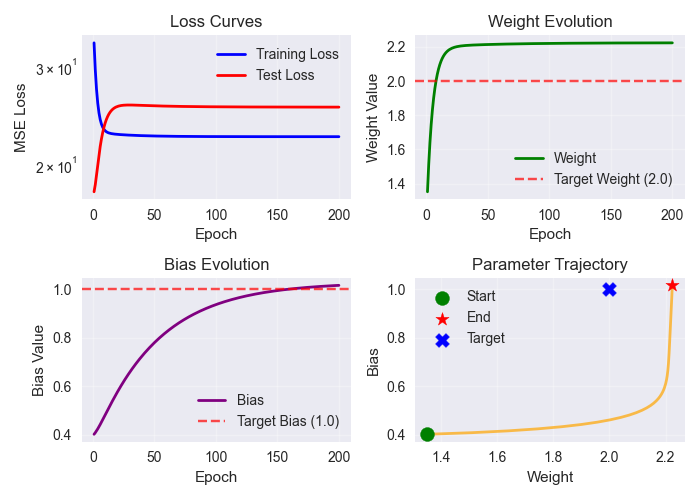

🎮 Interactive Training Configuration
Experiment with different hyperparameters and see how they affect training!


interactive(children=(FloatLogSlider(value=0.01, description='Learning Rate:', max=-1.0, min=-4.0, style=Slide…


🔧 Training Presets:



💡 Interactive Training Tips:
• Adjust the learning rate to see how it affects convergence speed and stability
• Try different optimizers - Adam usually converges faster than SGD
• Watch how initial parameters affect the training trajectory
• Use the preset buttons for quick configuration changes
• Toggle detailed plots on/off to focus on different aspects
• Higher learning rates may cause instability or divergence!


In [8]:
# Plot training history from previous training
def plot_training_history(train_losses, test_losses, weights_history, biases_history):
    """
    Visualize the complete training history
    """
    epochs = range(1, len(train_losses) + 1)
    
    fig, axes = plt.subplots(2, 2, figsize=(7, 5))
    
    # Loss curves
    axes[0, 0].plot(epochs, train_losses, 'b-', label='Training Loss', linewidth=2)
    axes[0, 0].plot(epochs, test_losses, 'r-', label='Test Loss', linewidth=2)
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('MSE Loss')
    axes[0, 0].set_title('Loss Curves')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].set_yscale('log')
    
    # Parameter evolution
    axes[0, 1].plot(epochs, weights_history, 'g-', label='Weight', linewidth=2)
    axes[0, 1].axhline(y=2.0, color='red', linestyle='--', alpha=0.7, label='Target Weight (2.0)')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Weight Value')
    axes[0, 1].set_title('Weight Evolution')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    axes[1, 0].plot(epochs, biases_history, 'purple', label='Bias', linewidth=2)
    axes[1, 0].axhline(y=1.0, color='red', linestyle='--', alpha=0.7, label='Target Bias (1.0)')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Bias Value')
    axes[1, 0].set_title('Bias Evolution')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Parameter trajectory in 2D space
    axes[1, 1].plot(weights_history, biases_history, 'orange', linewidth=2, alpha=0.7)
    axes[1, 1].scatter(weights_history[0], biases_history[0], color='green', s=100, 
                      marker='o', label='Start', zorder=5)
    axes[1, 1].scatter(weights_history[-1], biases_history[-1], color='red', s=100, 
                      marker='*', label='End', zorder=5)
    axes[1, 1].scatter(2, 1, color='blue', s=100, marker='X', label='Target', zorder=5)
    axes[1, 1].set_xlabel('Weight')
    axes[1, 1].set_ylabel('Bias')
    axes[1, 1].set_title('Parameter Trajectory')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Plot the training history from the previous section
if 'train_losses' in globals():
    plot_training_history(train_losses, test_losses, weights_history, biases_history)

# Interactive training function with real-time monitoring
def train_interactive_model(learning_rate=0.01, num_epochs=100, optimizer_type='sgd', 
                           initial_weight=0.0, initial_bias=0.0, show_real_time=True):
    """
    Interactive training function with real-time visualization
    """
    # Create a new model for this experiment
    model_exp = LinearModel().to(device)
    model_exp.set_parameters(initial_weight, initial_bias)
    
    print(f"🎯 Training Configuration:")
    print(f"   Learning Rate: {learning_rate}")
    print(f"   Epochs: {num_epochs}")
    print(f"   Optimizer: {optimizer_type}")
    print(f"   Initial Weight: {initial_weight}")
    print(f"   Initial Bias: {initial_bias}")
    print(f"   Target: Weight=2.0, Bias=1.0")
    print(f"   Real-time visualization: {show_real_time}")
    print("-" * 50)
    
    # Train the model
    train_losses_exp, test_losses_exp, weights_exp, biases_exp = train_model(
        model_exp, x_train_tensor, y_train_tensor, x_test_tensor, y_test_tensor,
        learning_rate=learning_rate, num_epochs=num_epochs, optimizer_type=optimizer_type
    )
    
    # Create comprehensive visualization
    final_weight, final_bias = model_exp.get_parameters()
    
    if show_real_time:
        fig, axes = plt.subplots(2, 2, figsize=(8, 6))
        
        # Loss curves
        epochs = range(1, len(train_losses_exp) + 1)
        axes[0, 0].plot(epochs, train_losses_exp, 'b-', label='Training', linewidth=2)
        axes[0, 0].plot(epochs, test_losses_exp, 'r-', label='Test', linewidth=2)
        axes[0, 0].set_xlabel('Epoch')
        axes[0, 0].set_ylabel('Loss')
        axes[0, 0].set_title('Loss Evolution')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        axes[0, 0].set_yscale('log')
        
        # Parameter evolution
        axes[0, 1].plot(epochs, weights_exp, 'g-', label='Weight', linewidth=2)
        axes[0, 1].plot(epochs, biases_exp, 'purple', label='Bias', linewidth=2)
        axes[0, 1].axhline(y=2.0, color='red', linestyle='--', alpha=0.7, label='Target Weight')
        axes[0, 1].axhline(y=1.0, color='orange', linestyle='--', alpha=0.7, label='Target Bias')
        axes[0, 1].set_xlabel('Epoch')
        axes[0, 1].set_ylabel('Parameter Value')
        axes[0, 1].set_title('Parameter Evolution')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # Parameter trajectory
        axes[1, 0].plot(weights_exp, biases_exp, 'orange', linewidth=2, alpha=0.7)
        axes[1, 0].scatter(weights_exp[0], biases_exp[0], color='green', s=100, marker='o', label='Start')
        axes[1, 0].scatter(weights_exp[-1], biases_exp[-1], color='red', s=100, marker='*', label='End')
        axes[1, 0].scatter(2, 1, color='blue', s=100, marker='X', label='Target')
        axes[1, 0].set_xlabel('Weight')
        axes[1, 0].set_ylabel('Bias')
        axes[1, 0].set_title('Parameter Trajectory')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # Final model performance
        x_plot = np.linspace(-6, 6, 100)
        x_plot_tensor = torch.FloatTensor(x_plot).unsqueeze(1).to(device)
        
        with torch.no_grad():
            y_pred_plot = model_exp(x_plot_tensor).cpu().numpy().squeeze()
        
        axes[1, 1].scatter(x_train, y_train, alpha=0.6, color='blue', s=40, label='Training data')
        axes[1, 1].scatter(x_test, y_test, alpha=0.6, color='green', s=40, label='Test data')
        
        y_true_plot = 2 * x_plot + 1
        axes[1, 1].plot(x_plot, y_true_plot, 'r--', linewidth=3, label='True function')
        axes[1, 1].plot(x_plot, y_pred_plot, 'orange', linewidth=3, 
                       label=f'Learned: y = {final_weight:.2f}x + {final_bias:.2f}')
        
        axes[1, 1].set_xlabel('x')
        axes[1, 1].set_ylabel('y')
        axes[1, 1].set_title('Final Model Performance')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    # Print final results
    print(f"\n✅ Training Results:")
    print(f"   Final Weight: {final_weight:.4f} (target: 2.0000, error: {abs(final_weight-2.0):.4f})")
    print(f"   Final Bias: {final_bias:.4f} (target: 1.0000, error: {abs(final_bias-1.0):.4f})")
    print(f"   Final Train Loss: {train_losses_exp[-1]:.6f}")
    print(f"   Final Test Loss: {test_losses_exp[-1]:.6f}")
    
    return model_exp, train_losses_exp, test_losses_exp, weights_exp, biases_exp

# Create interactive widget for training hyperparameter exploration
print("🎮 Interactive Training Configuration")
print("Experiment with different hyperparameters and see how they affect training!")

# Create widgets for hyperparameter exploration
lr_slider = widgets.FloatLogSlider(
    value=0.01,
    base=10,
    min=-4,  # 10^-4 = 0.0001
    max=-1,  # 10^-1 = 0.1
    step=0.1,
    description='Learning Rate:',
    style={'description_width': 'initial'}
)

epochs_slider = widgets.IntSlider(
    value=100,
    min=10,
    max=500,
    step=10,
    description='Epochs:',
    style={'description_width': 'initial'}
)

optimizer_dropdown = widgets.Dropdown(
    options=['sgd', 'adam', 'rmsprop'],
    value='adam',
    description='Optimizer:',
    style={'description_width': 'initial'}
)

init_weight_slider = widgets.FloatSlider(
    value=0.0,
    min=-3.0,
    max=3.0,
    step=0.1,
    description='Initial Weight:',
    style={'description_width': 'initial'}
)

init_bias_slider = widgets.FloatSlider(
    value=0.0,
    min=-3.0,
    max=3.0,
    step=0.1,
    description='Initial Bias:',
    style={'description_width': 'initial'}
)

show_plots_checkbox = widgets.Checkbox(
    value=True,
    description='Show detailed plots',
    style={'description_width': 'initial'}
)

# Create the interactive training widget
interactive_training = interactive(train_interactive_model,
                                 learning_rate=lr_slider,
                                 num_epochs=epochs_slider,
                                 optimizer_type=optimizer_dropdown,
                                 initial_weight=init_weight_slider,
                                 initial_bias=init_bias_slider,
                                 show_real_time=show_plots_checkbox)

display(interactive_training)

# Add quick preset buttons for common configurations
def set_slow_training():
    lr_slider.value = 0.001
    epochs_slider.value = 200
    optimizer_dropdown.value = 'sgd'

def set_fast_training():
    lr_slider.value = 0.05
    epochs_slider.value = 50
    optimizer_dropdown.value = 'adam'

def set_conservative():
    lr_slider.value = 0.01
    epochs_slider.value = 150
    optimizer_dropdown.value = 'adam'

def randomize_init():
    init_weight_slider.value = np.random.uniform(-2, 2)
    init_bias_slider.value = np.random.uniform(-2, 2)

# Create preset buttons for training configurations
slow_button = widgets.Button(description="Slow & Steady", button_style='info')
fast_button = widgets.Button(description="Fast Training", button_style='warning')
conservative_button = widgets.Button(description="Conservative", button_style='success')
random_init_button = widgets.Button(description="Random Init", button_style='')

slow_button.on_click(lambda b: set_slow_training())
fast_button.on_click(lambda b: set_fast_training())
conservative_button.on_click(lambda b: set_conservative())
random_init_button.on_click(lambda b: randomize_init())

print("\n🔧 Training Presets:")
training_button_box = widgets.HBox([conservative_button, slow_button, fast_button, random_init_button])
display(training_button_box)

print("\n💡 Interactive Training Tips:")
print("• Adjust the learning rate to see how it affects convergence speed and stability")
print("• Try different optimizers - Adam usually converges faster than SGD")
print("• Watch how initial parameters affect the training trajectory")
print("• Use the preset buttons for quick configuration changes")
print("• Toggle detailed plots on/off to focus on different aspects")
print("• Higher learning rates may cause instability or divergence!")

## 9. Experiment with Different Model Architectures

Now let's explore how different model architectures affect performance. We'll compare simple linear regression with polynomial features and multi-layer networks.

In [9]:
class PolynomialModel(nn.Module):
    """
    Polynomial regression model with degree 2: y = ax² + bx + c
    """
    def __init__(self, degree=2):
        super(PolynomialModel, self).__init__()
        self.degree = degree
        self.linear = nn.Linear(degree + 1, 1)
        nn.init.normal_(self.linear.weight, mean=0.0, std=1.0)
        nn.init.normal_(self.linear.bias, mean=0.0, std=1.0)
    
    def forward(self, x):
        # Create polynomial features [1, x, x², ...]
        features = torch.cat([x**i for i in range(self.degree + 1)], dim=1)
        return self.linear(features)

class MultiLayerModel(nn.Module):
    """
    Multi-layer neural network
    """
    def __init__(self, hidden_size=10):
        super(MultiLayerModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(1, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1)
        )
        
        # Initialize weights
        for layer in self.network:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_normal_(layer.weight)
                nn.init.zeros_(layer.bias)
    
    def forward(self, x):
        return self.network(x)

def interactive_architecture_comparison(architecture='Linear', hidden_size=10, poly_degree=2, 
                                      learning_rate=0.01, epochs=200):
    """
    Interactive function to compare different model architectures
    """
    print(f"🏗️ Training {architecture} Architecture...")
    print(f"Configuration: LR={learning_rate}, Epochs={epochs}")
    
    # Create the selected model
    if architecture == 'Linear':
        model = LinearModel()
        config_info = "Simple linear regression: y = wx + b"
    elif architecture == 'Polynomial':
        model = PolynomialModel(degree=poly_degree)
        config_info = f"Polynomial regression (degree {poly_degree})"
    elif architecture == 'Multi-layer':
        model = MultiLayerModel(hidden_size=hidden_size)
        config_info = f"Neural network with {hidden_size} hidden units"
    
    model = model.to(device)
    
    # Count parameters
    num_params = sum(p.numel() for p in model.parameters())
    print(f"Model: {config_info}")
    print(f"Parameters: {num_params}")
    print("-" * 50)
    
    # Train the model
    if architecture == 'Polynomial':
        # For polynomial models, we need special training
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        criterion = nn.MSELoss()
        
        train_losses = []
        test_losses = []
        
        for epoch in range(epochs):
            model.train()
            optimizer.zero_grad()
            predictions = model(x_train_tensor)
            train_loss = criterion(predictions, y_train_tensor)
            train_loss.backward()
            optimizer.step()
            
            # Evaluate on test set
            model.eval()
            with torch.no_grad():
                test_predictions = model(x_test_tensor)
                test_loss = criterion(test_predictions, y_test_tensor)
            
            train_losses.append(train_loss.item())
            test_losses.append(test_loss.item())
            
            if (epoch + 1) % 50 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss.item():.6f}, '
                      f'Test Loss: {test_loss.item():.6f}')
    elif architecture == 'Multi-layer':
        # For multi-layer models, use specialized training with different optimizer settings
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
        criterion = nn.MSELoss()
        
        train_losses = []
        test_losses = []
        
        for epoch in range(epochs):
            model.train()
            optimizer.zero_grad()
            predictions = model(x_train_tensor)
            train_loss = criterion(predictions, y_train_tensor)
            train_loss.backward()
            
            # Gradient clipping to prevent exploding gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            
            # Evaluate on test set
            model.eval()
            with torch.no_grad():
                test_predictions = model(x_test_tensor)
                test_loss = criterion(test_predictions, y_test_tensor)
            
            train_losses.append(train_loss.item())
            test_losses.append(test_loss.item())
            
            if (epoch + 1) % 50 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss.item():.6f}, '
                      f'Test Loss: {test_loss.item():.6f}')
    else:
        # For linear models, use the existing train_model function
        train_losses, test_losses, _, _ = train_model(
            model, x_train_tensor, y_train_tensor, x_test_tensor, y_test_tensor,
            learning_rate=learning_rate, num_epochs=epochs, optimizer_type='adam'
        )
    
    final_train_loss = train_losses[-1]
    final_test_loss = test_losses[-1]
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))
    
    # Model predictions
    x_plot = np.linspace(-6, 6, 200)
    x_plot_tensor = torch.FloatTensor(x_plot).unsqueeze(1).to(device)
    
    model.eval()
    with torch.no_grad():
        y_pred_plot = model(x_plot_tensor).cpu().numpy().squeeze()
        train_pred = model(x_train_tensor).cpu().numpy().squeeze()
        test_pred = model(x_test_tensor).cpu().numpy().squeeze()
    
    # 1. Model predictions
    axes[0, 0].scatter(x_train, y_train, alpha=0.6, color='blue', s=40, label='Training data')
    axes[0, 0].scatter(x_test, y_test, alpha=0.6, color='green', s=40, label='Test data')
    
    y_true_plot = 2 * x_plot + 1
    axes[0, 0].plot(x_plot, y_true_plot, 'r--', linewidth=3, label='True: y = 2x + 1')
    axes[0, 0].plot(x_plot, y_pred_plot, 'orange', linewidth=3, label=f'{architecture} Model')
    
    axes[0, 0].set_xlabel('x')
    axes[0, 0].set_ylabel('y')
    axes[0, 0].set_title(f'{architecture} Model Predictions')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].set_xlim(-6, 6)
    axes[0, 0].set_ylim(-15, 15)
    
    # 2. Loss curves
    epochs_range = range(1, len(train_losses) + 1)
    axes[0, 1].plot(epochs_range, train_losses, 'b-', label='Training Loss', linewidth=2)
    axes[0, 1].plot(epochs_range, test_losses, 'r-', label='Test Loss', linewidth=2)
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('MSE Loss')
    axes[0, 1].set_title('Training Progress')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_yscale('log')
    
    # 3. Predictions vs Actual
    all_actual = np.concatenate([y_train, y_test])
    all_pred = np.concatenate([train_pred, test_pred])
    
    axes[1, 0].scatter(y_train, train_pred, alpha=0.7, color='blue', label='Training', s=50)
    axes[1, 0].scatter(y_test, test_pred, alpha=0.7, color='green', label='Test', s=50)
    
    min_val, max_val = all_actual.min(), all_actual.max()
    axes[1, 0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect prediction')
    
    axes[1, 0].set_xlabel('Actual Values')
    axes[1, 0].set_ylabel('Predicted Values')
    axes[1, 0].set_title('Predicted vs Actual')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Residuals analysis
    train_residuals = y_train - train_pred
    test_residuals = y_test - test_pred
    
    axes[1, 1].scatter(train_pred, train_residuals, alpha=0.7, color='blue', label='Training', s=50)
    axes[1, 1].scatter(test_pred, test_residuals, alpha=0.7, color='green', label='Test', s=50)
    axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
    
    axes[1, 1].set_xlabel('Predicted Values')
    axes[1, 1].set_ylabel('Residuals')
    axes[1, 1].set_title('Residuals Analysis')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and display metrics
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    
    overfitting_ratio = final_test_loss / final_train_loss
    
    print(f"\n📊 {architecture} Model Performance:")
    print(f"   Parameters: {num_params}")
    print(f"   Train Loss (MSE): {final_train_loss:.6f}")
    print(f"   Test Loss (MSE): {final_test_loss:.6f}")
    print(f"   Train R²: {train_r2:.4f}")
    print(f"   Test R²: {test_r2:.4f}")
    print(f"   Train MAE: {train_mae:.4f}")
    print(f"   Test MAE: {test_mae:.4f}")
    print(f"   Overfitting ratio: {overfitting_ratio:.3f}")
    
    if overfitting_ratio > 1.2:
        print("   ⚠️  Model may be overfitting (test loss >> train loss)")
    elif overfitting_ratio < 1.1:
        print("   ✅ Good generalization (test loss ≈ train loss)")
    else:
        print("   ℹ️  Moderate generalization gap")
    
    return model, final_train_loss, final_test_loss, num_params

# Create interactive widget for architecture comparison
print("🏗️ Interactive Architecture Comparison")
print("Experiment with different model architectures and their hyperparameters!")

# Create widgets for architecture comparison
architecture_dropdown = widgets.Dropdown(
    options=['Linear', 'Polynomial', 'Multi-layer'],
    value='Linear',
    description='Architecture:',
    style={'description_width': 'initial'}
)

hidden_size_slider = widgets.IntSlider(
    value=10,
    min=5,
    max=100,
    step=5,
    description='Hidden Size:',
    style={'description_width': 'initial'}
)

poly_degree_slider = widgets.IntSlider(
    value=2,
    min=1,
    max=5,
    step=1,
    description='Poly Degree:',
    style={'description_width': 'initial'}
)

arch_lr_slider = widgets.FloatLogSlider(
    value=0.01,
    base=10,
    min=-4,
    max=-1,
    step=0.1,
    description='Learning Rate:',
    style={'description_width': 'initial'}
)

arch_epochs_slider = widgets.IntSlider(
    value=200,
    min=50,
    max=500,
    step=50,
    description='Epochs:',
    style={'description_width': 'initial'}
)

# Create the interactive architecture widget
interactive_arch = interactive(interactive_architecture_comparison,
                              architecture=architecture_dropdown,
                              hidden_size=hidden_size_slider,
                              poly_degree=poly_degree_slider,
                              learning_rate=arch_lr_slider,
                              epochs=arch_epochs_slider)

display(interactive_arch)

# Add quick preset buttons for architecture exploration
def set_simple_linear():
    architecture_dropdown.value = 'Linear'
    arch_lr_slider.value = 0.01
    arch_epochs_slider.value = 200

def set_polynomial():
    architecture_dropdown.value = 'Polynomial'
    poly_degree_slider.value = 2
    arch_lr_slider.value = 0.01
    arch_epochs_slider.value = 300

def set_small_nn():
    architecture_dropdown.value = 'Multi-layer'
    hidden_size_slider.value = 10
    arch_lr_slider.value = 0.01
    arch_epochs_slider.value = 200

def set_large_nn():
    architecture_dropdown.value = 'Multi-layer'
    hidden_size_slider.value = 50
    arch_lr_slider.value = 0.001
    arch_epochs_slider.value = 300

# Create preset buttons for architecture exploration
linear_button = widgets.Button(description="Simple Linear", button_style='primary')
poly_button = widgets.Button(description="Polynomial", button_style='info')
small_nn_button = widgets.Button(description="Small NN", button_style='success')
large_nn_button = widgets.Button(description="Large NN", button_style='warning')

linear_button.on_click(lambda b: set_simple_linear())
poly_button.on_click(lambda b: set_polynomial())
small_nn_button.on_click(lambda b: set_small_nn())
large_nn_button.on_click(lambda b: set_large_nn())

print("\n🔧 Architecture Presets:")
arch_button_box = widgets.HBox([linear_button, poly_button, small_nn_button, large_nn_button])
display(arch_button_box)

print("\n� Architecture Comparison Tips:")
print("• Linear: Simple and interpretable, good baseline")
print("• Polynomial: Can capture non-linear patterns, but may overfit")
print("• Multi-layer: Very flexible, but needs more data and careful tuning")
print("• Compare the overfitting ratio: Test Loss / Train Loss")
print("• Watch how model complexity affects generalization")
print("• Try different hidden sizes and polynomial degrees")
print("• Use the preset buttons for quick architecture comparisons!")

🏗️ Interactive Architecture Comparison
Experiment with different model architectures and their hyperparameters!


interactive(children=(Dropdown(description='Architecture:', options=('Linear', 'Polynomial', 'Multi-layer'), s…


🔧 Architecture Presets:



� Architecture Comparison Tips:
• Linear: Simple and interpretable, good baseline
• Polynomial: Can capture non-linear patterns, but may overfit
• Multi-layer: Very flexible, but needs more data and careful tuning
• Compare the overfitting ratio: Test Loss / Train Loss
• Watch how model complexity affects generalization
• Try different hidden sizes and polynomial degrees
• Use the preset buttons for quick architecture comparisons!


## 🎯 Key Takeaways and Summary

Congratulations! You've completed a comprehensive journey through linear model training with PyTorch. Here are the key concepts you've learned:

### 📚 **Core Concepts Covered:**

1. **Data Generation**: Created synthetic noisy data following `y = 2x + 1`
2. **Model Architecture**: Implemented linear regression using PyTorch's `nn.Module`
3. **Loss Functions**: Explored MSE, MAE, and Huber loss with 3D visualizations
4. **Training Loop**: Complete pipeline with forward pass, backpropagation, and optimization
5. **Evaluation**: Comprehensive metrics including MSE, MAE, R², and residual analysis
6. **Hyperparameter Tuning**: Interactive exploration of learning rates, optimizers, and epochs
7. **Architecture Comparison**: Linear vs. polynomial vs. multi-layer networks

### 🔍 **Key Insights:**

- **Loss Landscape**: The loss function has a single global minimum for linear regression
- **Learning Rate**: Too high → divergence, too low → slow convergence
- **Model Complexity**: More parameters don't always mean better performance
- **Overfitting**: Complex models can memorize training data but fail on test data
- **Optimization**: Different optimizers (SGD, Adam, RMSprop) have different convergence properties

### 🎮 **Interactive Learning Benefits:**

- **Visual Understanding**: Saw how parameters affect predictions in real-time
- **Experimental Mindset**: Tested different configurations to understand trade-offs
- **Practical Experience**: Gained hands-on experience with PyTorch training loops

---

**Remember**: Machine learning is both an art and a science. The interactive visualizations in this notebook help build intuition, but real-world applications require careful consideration of data quality, model validation, and deployment constraints.

Happy learning! 🚀🤖